In [11]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def permute(data):
    return data[:, [0, 1, 4, 5, 2, 3, 6]]

def plot(data):
    plt.subplot(7, 1, 1)
    for i_channel in range(7):
        plt.subplot(7, 1, i_channel+1)
        plt.plot(data[:, i_channel])
        plt.ylabel(f'{i_channel}')
    plt.xlabel('Sample')
    plt.show()

def beamform(data):
    data[:, 0] = data[:, 0]
    data[:, 1] = data[:, 1]
    data[:, 2] = np.roll(data[:, 2], 5)
    data[:, 3] = np.roll(data[:, 3], 5)
    data[:, 4] = data[:, 4]
    data[:, 5] = np.roll(data[:, 5], -5)
    data[:, 6] = np.roll(data[:, 6], -5)

    data = np.sum(data, axis=1)/7
    return data

def envelope(data):
    abs_data = np.abs(data)
    env = 2.828*scipy.signal.oaconvolve(abs_data, np.ones(22050)/22050, mode='same')
    return env

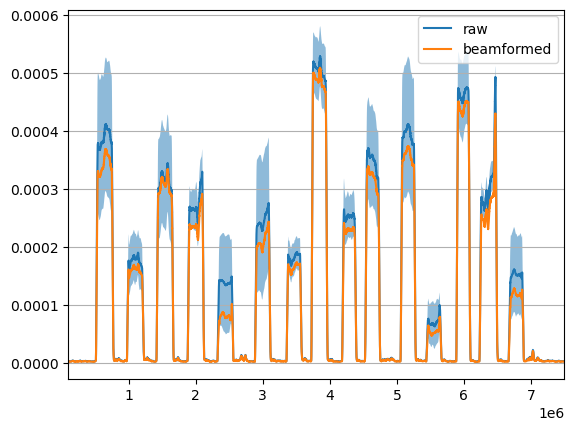

In [12]:
# 700 Hz, single source

data = np.load('raw_1.npy')
data = permute(data)

# peak filter at 700Hz
b, a = scipy.signal.iirpeak(700, 30, 44100)
data = scipy.signal.filtfilt(b, a, data, axis=0)

# plot statistics of the raw signals from each microphone
raw_envelopes = np.array([envelope(data[:, i_channel]) for i_channel in range(7)]).T
mean_raw_envelope = np.mean(raw_envelopes, axis=1)
stdev_raw_envelope = np.std(raw_envelopes, axis=1)
plt.plot(mean_raw_envelope, label='raw')
plt.fill_between(
    np.arange(len(mean_raw_envelope)), 
    mean_raw_envelope-stdev_raw_envelope, 
    mean_raw_envelope+stdev_raw_envelope, 
    alpha=0.5
)

# beamform
data = beamform(data)

# plot envelope of beamformed signal
plt.plot(envelope(data), label='beamformed')

plt.legend()
plt.grid(axis='y')
plt.xlim([0.1e6, 7.5e6])
plt.show()

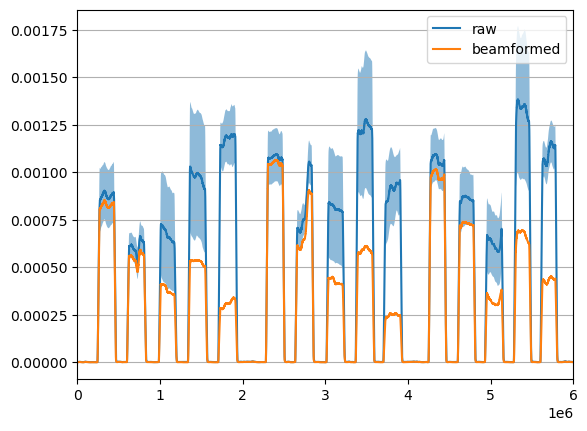

In [13]:
# 1400 Hz, single source

data = np.load('raw_2.npy')
data = permute(data)

# peak filter at 1400Hz
b, a = scipy.signal.iirpeak(1400, 30, 44100)
data = scipy.signal.filtfilt(b, a, data, axis=0)

# plot statistics of the raw signals from each microphone
raw_envelopes = np.array([envelope(data[:, i_channel]) for i_channel in range(7)]).T
mean_raw_envelope = np.mean(raw_envelopes, axis=1)
stdev_raw_envelope = np.std(raw_envelopes, axis=1)
plt.plot(mean_raw_envelope, label='raw')
plt.fill_between(
    np.arange(len(mean_raw_envelope)), 
    mean_raw_envelope-stdev_raw_envelope, 
    mean_raw_envelope+stdev_raw_envelope, 
    alpha=0.5
)

# beamform
data = beamform(data)

# plot envelope of beamformed signal
plt.plot(envelope(data), label='beamformed')

plt.legend()
plt.grid(axis='y')
plt.xlim([0.0e6, 6.0e6])
plt.show()

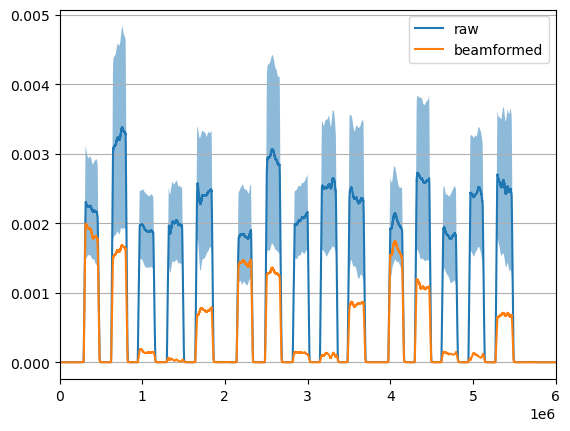

In [14]:
# 2800 Hz, single source

data = np.load('raw_3.npy')
data = permute(data)

# peak filter at 2800Hz
b, a = scipy.signal.iirpeak(2800, 30, 44100)
data = scipy.signal.filtfilt(b, a, data, axis=0)

# plot statistics of the raw signals from each microphone
raw_envelopes = np.array([envelope(data[:, i_channel]) for i_channel in range(7)]).T
mean_raw_envelope = np.mean(raw_envelopes, axis=1)
stdev_raw_envelope = np.std(raw_envelopes, axis=1)
plt.plot(mean_raw_envelope, label='raw')
plt.fill_between(
    np.arange(len(mean_raw_envelope)), 
    mean_raw_envelope-stdev_raw_envelope, 
    mean_raw_envelope+stdev_raw_envelope, 
    alpha=0.5
)

# beamform
data = beamform(data)

# plot envelope of beamformed signal
plt.plot(envelope(data), label='beamformed')

plt.legend()
plt.grid(axis='y')
plt.xlim([0.0e6, 6.0e6])
plt.show()

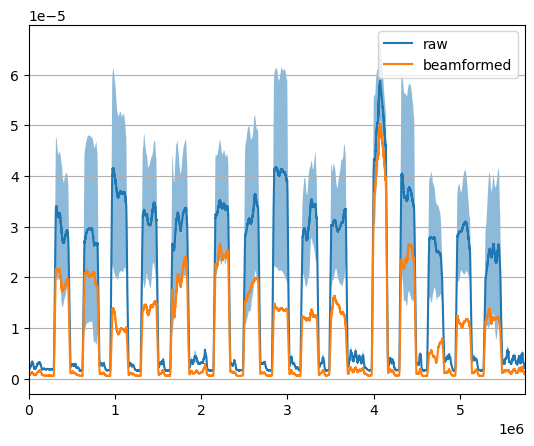

In [15]:
# 5600 Hz, single source

data = np.load('raw_3.npy')
data = permute(data)

# peak filter at 5600Hz
b, a = scipy.signal.iirpeak(5600, 30, 44100)
data = scipy.signal.filtfilt(b, a, data, axis=0)

# plot statistics of the raw signals from each microphone
raw_envelopes = np.array([envelope(data[:, i_channel]) for i_channel in range(7)]).T
mean_raw_envelope = np.mean(raw_envelopes, axis=1)
stdev_raw_envelope = np.std(raw_envelopes, axis=1)
plt.plot(mean_raw_envelope, label='raw')
plt.fill_between(
    np.arange(len(mean_raw_envelope)), 
    mean_raw_envelope-stdev_raw_envelope, 
    mean_raw_envelope+stdev_raw_envelope, 
    alpha=0.5
)

# beamform
data = beamform(data)

# plot envelope of beamformed signal
plt.plot(envelope(data), label='beamformed')

plt.legend()
plt.grid(axis='y')
plt.xlim([0.0e6, 5.75e6])
plt.show()